In [1]:
# Import necessary library
import pandas as pd

# Define the URL of the dataset
url = r'C:\Users\User\Desktop\Immersivify\IRIS.csv'  # Replace with your dataset's URL

# Load the dataset into a pandas DataFrame
data = pd.read_csv(url)

# Display the feature names
print("Feature Names in the Dataset:")
for feature in data.columns:
    print(f"- {feature}")


Feature Names in the Dataset:
- sepal_length
- sepal_width
- petal_length
- petal_width
- species


In [3]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display missing values for each feature
print("\nMissing Values in Each Feature:")
print(missing_values)



Missing Values in Each Feature:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [5]:
# Identify numerical and categorical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Display the results
print("\nNumerical Features:")
for feature in numerical_features:
    print(f"- {feature}")

print("\nCategorical Features:")
for feature in categorical_features:
    print(f"- {feature}")



Numerical Features:
- sepal_length
- sepal_width
- petal_length
- petal_width

Categorical Features:
- species


In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder object
label_encoder = LabelEncoder()

# Identify the dependent variable (assumed to be the last column of the dataset)
dependent_variable = data.columns[-1]  # Assuming the last column is the dependent variable

# Apply label encoding to the dependent variable (categorical feature)
data[dependent_variable] = label_encoder.fit_transform(data[dependent_variable])

# Display the mapping of categories to numeric values
label_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print("\nLabel Encoding Mapping (Category to Numeric Value):")
for category, code in label_mapping.items():
    print(f"- {category}: {code}")



Label Encoding Mapping (Category to Numeric Value):
- 0: Iris-setosa
- 1: Iris-versicolor
- 2: Iris-virginica


In [13]:
# Calculate the count of each species in the 'species' column
species_counts = data['species'].value_counts()

# Display the count of each species
print("\nCount of Each Species in the Dataset:")
print(species_counts)


#OBSERVATION : It is balanced dataset. 


Count of Each Species in the Dataset:
species
0    50
1    50
2    50
Name: count, dtype: int64


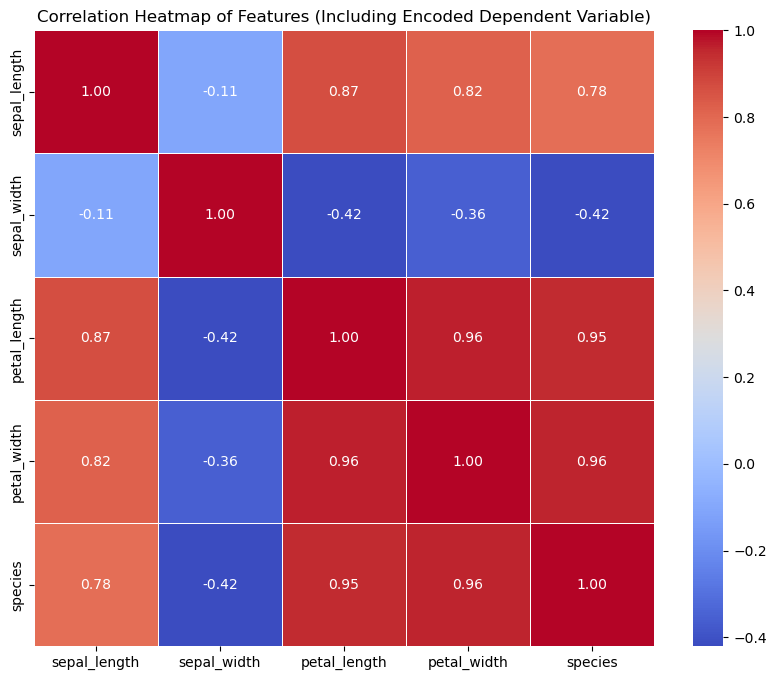

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for the entire dataset (including the encoded dependent variable)
correlation_matrix = data.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features (Including Encoded Dependent Variable)")
plt.show()


In [15]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = data.drop(columns=['species'])  # Features (excluding the 'species' column)
y = data['species']  # Target variable (species)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f"\nTraining set size: X_train - {X_train.shape}, y_train - {y_train.shape}")
print(f"Testing set size: X_test - {X_test.shape}, y_test - {y_test.shape}")



Training set size: X_train - (120, 4), y_train - (120,)
Testing set size: X_test - (30, 4), y_test - (30,)


In [17]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training features, and transform the testing features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the scaled feature samples (optional)
print("\nScaled Training Features (First 5 samples):")
print(X_train_scaled[:5])

print("\nScaled Testing Features (First 5 samples):")
print(X_test_scaled[:5])



Scaled Training Features (First 5 samples):
[[-1.47393679  1.22037928 -1.5639872  -1.30948358]
 [-0.13307079  3.02001693 -1.27728011 -1.04292204]
 [ 1.08589829  0.09560575  0.38562104  0.28988568]
 [-1.23014297  0.77046987 -1.21993869 -1.30948358]
 [-1.7177306   0.32056046 -1.39196294 -1.30948358]]

Scaled Testing Features (First 5 samples):
[[ 0.35451684 -0.57925837  0.5576453   0.02332414]
 [-0.13307079  1.67028869 -1.16259727 -1.17620281]
 [ 2.30486738 -1.02916778  1.81915651  1.48941263]
 [ 0.23261993 -0.35430366  0.44296246  0.42316645]
 [ 1.2077952  -0.57925837  0.61498672  0.28988568]]


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNN classifier with a chosen value of k (e.g., k=3)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier on the scaled training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = knn.predict(X_train_scaled)

# Make predictions on the test set
y_test_pred = knn.predict(X_test_scaled)

# Calculate the accuracy of the model for both training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display the accuracies
print(f"\nTraining Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")



Training Accuracy: 94.17%
Testing Accuracy: 100.00%



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Sensitivity (Recall) for each class:
[1. 1. 1.]

Specificity for each class:
[nan nan nan]


C:\Users\User\AppData\Local\Temp\ipykernel_22616\2838896911.py:17: RuntimeWarning: invalid value encountered in divide
  specificity = specificity / (cm.sum(axis=0) - cm.diagonal())  # Specificity for each class


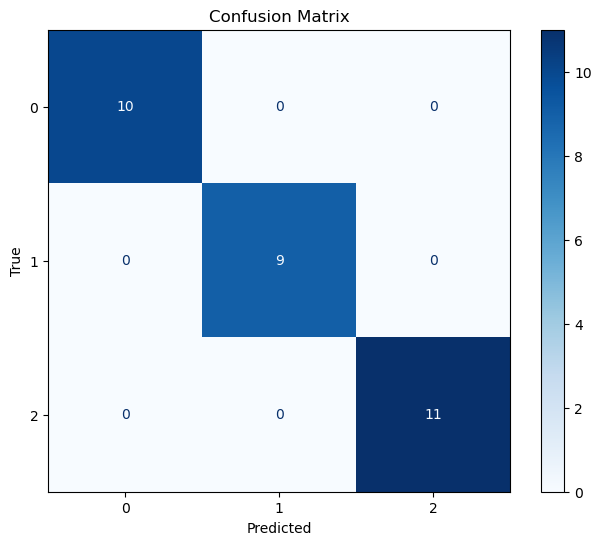

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the classification report (Precision, Recall, F1 Score, etc.)
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Calculate Sensitivity (Recall) and Specificity
# Sensitivity (Recall) for each class is equivalent to recall, Specificity for each class is calculated as:
# Specificity = True Negative / (True Negative + False Positive)
sensitivity = cm.diagonal() / cm.sum(axis=1)  # Sensitivity for each class
specificity = cm.sum(axis=0) - cm.diagonal()  # False positives for each class
specificity = specificity / (cm.sum(axis=0) - cm.diagonal())  # Specificity for each class

# Display Sensitivity and Specificity
print("\nSensitivity (Recall) for each class:")
print(sensitivity)

print("\nSpecificity for each class:")
print(specificity)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues", ax=ax)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the entire feature set (X) for cross-validation
X_scaled = scaler.fit_transform(X)

# Initialize the KNN classifier with a chosen value of k (e.g., k=3)
knn = KNeighborsClassifier(n_neighbors=3)

# Perform K-Fold Cross Validation
# We use 5 folds here, you can adjust the value of cv for different numbers of folds
cv_scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')

# Display the cross-validation scores for each fold
print("\nCross-validation accuracy for each fold:")
print(cv_scores)

# Calculate and display the average accuracy
average_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validation Accuracy: {average_accuracy * 100:.2f}%")



Cross-validation accuracy for each fold:
[0.96666667 0.96666667 0.93333333 0.9        1.        ]

Average Cross-validation Accuracy: 95.33%


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

# Define the parameter grid to search over
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],  # Trying different values for the number of neighbors
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Trying different distance metrics
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Initialize the StratifiedKFold (for stratified K-fold cross-validation)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with StratifiedKFold and scoring as 'accuracy'
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=kfold, scoring='accuracy')

# Fit GridSearchCV to the entire scaled dataset
grid_search.fit(X_scaled, y)

# Get the best parameters and the best score (highest accuracy)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Display the best parameters and the best accuracy score
print(f"\nBest Parameters from Grid Search: {best_params}")
print(f"Best Accuracy from Grid Search with K-Fold Cross Validation: {best_score * 100:.2f}%")



Best Parameters from Grid Search: {'metric': 'euclidean', 'n_neighbors': 5}
Best Accuracy from Grid Search with K-Fold Cross Validation: 96.67%


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

# Define the parameter grid to search over
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],  # Trying different values for the number of neighbors
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Trying different distance metrics
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Initialize the StratifiedKFold (for stratified K-fold cross-validation)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with StratifiedKFold and scoring as 'accuracy'
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=kfold, scoring='accuracy')

# Fit GridSearchCV to the entire scaled dataset
grid_search.fit(X_scaled, y)

# Get the best parameters and the best score (highest accuracy)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Display the best parameters and the best accuracy score
print(f"\nBest Parameters from Grid Search: {best_params}")
print(f"Best Accuracy from Grid Search with K-Fold Cross Validation: {best_score * 100:.2f}%")



Best Parameters from Grid Search: {'metric': 'euclidean', 'n_neighbors': 5}
Best Accuracy from Grid Search with K-Fold Cross Validation: 96.67%


In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernel functions
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

# Initialize the SVM classifier
svm = SVC()

# Initialize GridSearchCV with scoring as 'accuracy' (no need for cross-validation parameter here)
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, scoring='accuracy')

# Fit GridSearchCV to the entire scaled dataset
grid_search_svm.fit(X_scaled, y)

# Get the best parameters and the best score (highest accuracy)
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

# Display the best parameters and the best accuracy score
print(f"\nBest Parameters from Grid Search (SVM): {best_params_svm}")
print(f"Best Accuracy from Grid Search (SVM): {best_score_svm * 100:.2f}%")



Best Parameters from Grid Search (SVM): {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy from Grid Search (SVM): 97.33%


In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define the parameter grid to search over
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernel functions
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

# Initialize the SVM classifier
svm = SVC()

# Initialize StratifiedKFold (for stratified K-fold cross-validation)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with StratifiedKFold and scoring as 'accuracy'
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=kfold, scoring='accuracy')

# Fit GridSearchCV to the entire scaled dataset
grid_search_svm.fit(X_scaled, y)

# Get the best parameters and the best score (highest accuracy)
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

# Display the best parameters and the best accuracy score
print(f"\nBest Parameters from Grid Search (SVM): {best_params_svm}")
print(f"Best Accuracy from Grid Search with K-Fold Cross Validation (SVM): {best_score_svm * 100:.2f}%")



Best Parameters from Grid Search (SVM): {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy from Grid Search with K-Fold Cross Validation (SVM): 97.33%


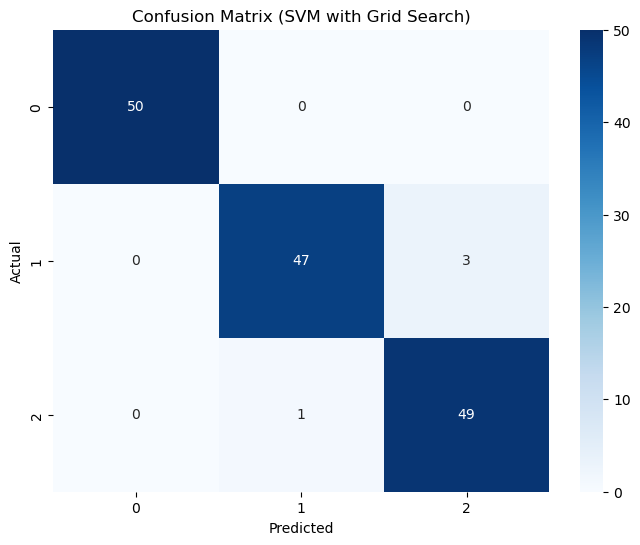

Classification Report (SVM):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

Precision: 0.97
Recall (Sensitivity): 0.97
F1 Score: 0.97
Specificity: 1.00


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Make predictions on the entire dataset (use training data for simplicity)
y_pred_svm = grid_search_svm.predict(X_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix (SVM with Grid Search)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compute classification metrics
report = classification_report(y, y_pred_svm, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
support = report['weighted avg']['support']

# Sensitivity (Recall for class 1) and Specificity (Recall for class 0)
sensitivity = recall
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # Specificity for class 0 (True Negative Rate)

# Display metrics
print(f"Classification Report (SVM):\n {classification_report(y, y_pred_svm)}")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {sensitivity:.2f}")
print(f"F1 Score: {f1_score:.2f}")
print(f"Specificity: {specificity:.2f}")


In [37]:
# Example data points (for demonstration purposes)
example_data = np.array([[5.1, 3.5, 1.4, 0.2],  # Example 1
                         [6.9, 3.1, 4.9, 1.5],  # Example 2
                         [7.3, 2.9, 6.3, 1.8]]) # Example 3

# Perform scaling on the example data (same scaling as training data)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
example_data_scaled = scaler.fit_transform(example_data)

# Predict the classes using the trained SVM model
predicted_classes = grid_search_svm.predict(example_data_scaled)

# Actual classes for the examples (you can replace these with actual class labels for the samples)
actual_classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Display the predicted vs actual classes
print("Predicted vs Actual Classes:")
for i in range(len(example_data)):
    print(f"Example {i+1}:")
    print(f"Predicted Class: {predicted_classes[i]}")
    print(f"Actual Class: {actual_classes[i]}")
    print("-" * 30)


Predicted vs Actual Classes:
Example 1:
Predicted Class: 0
Actual Class: Iris-setosa
------------------------------
Example 2:
Predicted Class: 1
Actual Class: Iris-versicolor
------------------------------
Example 3:
Predicted Class: 2
Actual Class: Iris-virginica
------------------------------


In [39]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize the Naive Bayes classifier
nb = GaussianNB()

# Define the parameter grid for Naive Bayes
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  # Hyperparameter for Naive Bayes
}

# Initialize StratifiedKFold (for stratified K-fold cross-validation)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV with K-Fold Cross Validation
grid_search_nb_kfold = GridSearchCV(estimator=nb, param_grid=param_grid_nb, cv=kfold, scoring='accuracy')

# Fit the GridSearchCV with K-fold cross-validation
grid_search_nb_kfold.fit(X_scaled, y)

# Get the best parameters and the best accuracy score from K-Fold
best_params_nb_kfold = grid_search_nb_kfold.best_params_
best_score_nb_kfold = grid_search_nb_kfold.best_score_

# Make predictions on the test set
y_pred_kfold = grid_search_nb_kfold.predict(X_test_scaled)

# Calculate the accuracy on the test set
test_accuracy_kfold = accuracy_score(y_test, y_pred_kfold)

# Without K-Fold Cross Validation, directly fit the Naive Bayes model
nb.fit(X_train_scaled, y_train)

# Make predictions on the test set without K-Fold
y_pred_without_kfold = nb.predict(X_test_scaled)

# Calculate the accuracy without K-Fold
test_accuracy_without_kfold = accuracy_score(y_test, y_pred_without_kfold)

# Display the results
print(f"Best Parameters from Grid Search with K-Fold Cross Validation: {best_params_nb_kfold}")
print(f"Best Accuracy from Grid Search with K-Fold Cross Validation: {best_score_nb_kfold * 100:.2f}%")
print(f"Test Accuracy with K-Fold Cross Validation: {test_accuracy_kfold * 100:.2f}%")
print(f"Test Accuracy without K-Fold Cross Validation: {test_accuracy_without_kfold * 100:.2f}%")


Best Parameters from Grid Search with K-Fold Cross Validation: {'var_smoothing': 1e-09}
Best Accuracy from Grid Search with K-Fold Cross Validation: 94.67%
Test Accuracy with K-Fold Cross Validation: 100.00%
Test Accuracy without K-Fold Cross Validation: 100.00%
